### Fit lineare e Test del Chi Quadro ###
Inserire il livello di criticità nell variabile 'alpha' e le unità di misura del coeeficiente angolare 'unma' e della intercetta 'unmb'



Eseguire la cella sottostante solo se si deve convertire un file ```.xlsx``` a ```.csv```.

Il file ```.xlsx``` deve avere solo una tabella senza intestazioni. 

In [48]:
import pandas as pd
from IPython.display import display

##Create or empty dati csv
open('dati.csv', 'w').close()

read_file = pd.read_excel(r'datiexx.xlsx')
read_file.to_csv(r'dati.csv', index = False, header=False)
datitestdf = pd.read_csv('dati.csv')

print('\n','DataFrame di dati.csv:','\n')
display(datitestdf)


 DataFrame di dati.csv: 



,15.05,17.37,0.01
0,16.05,17.39,0.01
1,17.05,17.40,0.01
2,18.05,17.42,0.01
3,19.05,17.44,0.01


### Dati in input


 numero di classi:  5 


 xdata:  [15.05 16.05 17.05 18.05 19.05] 


 ydata:  [17.37 17.39 17.4  17.42 17.44] 


 yerr:  [0.01 0.01 0.01 0.01 0.01] 




### Calcolo di correlazione


coefficiente correlazione =  0.9948497511671069


 [[   50000.   852500.]
 [  852500. 14635125.]] 

[[ 2.927025e-03 -1.705000e-04]
 [-1.705000e-04  1.000000e-05]]

[[1.00000000e+00 1.77635684e-15]
 [0.00000000e+00 1.00000000e+00]]


 [  870200. 14838610.] 

[1.711415e+01 1.700000e-02]




### Output dei test



 intercetta a (u.m.)=  17.11414999999988
 coeff.angolare b (u.m.)=  0.016999999999995907
 errore su intercetta siga (u.m.)=  0.05410198702450748
 errore su coeff.angolare sigb (u.m.)=  0.003162277660168366



 Chi^2 =  0.30000000000016486
 errore standard della stima (u.m.) =  0.003162277660169248

Chi quadro critico,  7.814727903251179
Chi quadro sospetto,  0.35184631774927144
Esito del test,  Sospetto






### Dataframe di correlazione e fit

,Variabile,Valore
0,Coefficiente di corr.,0.994850
1,Intercetta (a) [cm],17.114150
2,Coefficiente angolare (b) [N],0.017000
3,Errore su a [cm],0.054102
4,Errore su b [N],0.003162
,Variabile,Valore
0,Livello di significatività,0.05
1,Gradi di libertà,3
2,Chi quadro,0.30000000000016486
3,Chi quadro critico,7.814727903251179


### Tabelle in LaTeX



\begin{table}[ht]
\centering
\caption{Dati relativi al fit lineare}
\label{corr252}
\begin{tabular}{lr}
\toprule
                    Variabile &    Valore \\
\midrule
        Coefficiente di corr. &  0.994850 \\
          Intercetta (a) [cm] & 17.114150 \\
Coefficiente angolare (b) [N] &  0.017000 \\
             Errore su a [cm] &  0.054102 \\
              Errore su b [N] &  0.003162 \\
\bottomrule
\end{tabular}
\end{table}



\begin{table}[ht]
\centering
\caption{Dati relativi al test del $\chi^2$}
\label{fit646}
\begin{tabular}{ll}
\toprule
                 Variabile &              Valore \\
\midrule
Livello di significatività &                0.05 \\
          Gradi di libertà &                   3 \\
               Chi quadro  & 0.30000000000016486 \\
        Chi quadro critico &   7.814727903251179 \\
       Chi quadro sospetto & 0.35184631774927144 \\
                     Esito &            Sospetto \\
\bottomrule
\end{tabular}
\end{table}





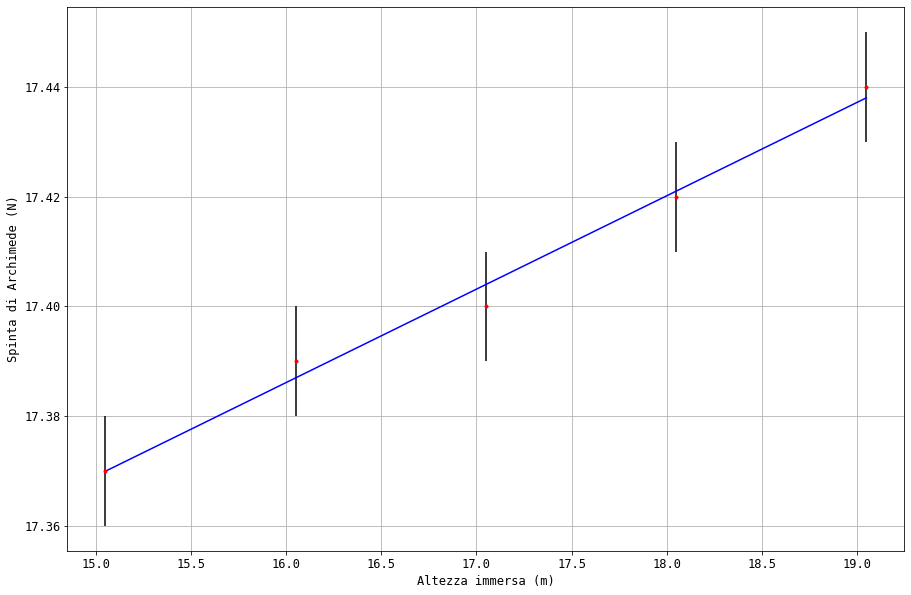

In [75]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
import numpy as np
import scipy.stats
import csv
import pandas as pd
from random import randint


#Livello di criticità es. (.05)
alpha=.05
unma='cm'
unmb='N'
plt.rcParams['figure.figsize'] = [15, 10]


##Display tables side by side

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
##Create or empty corr and fit csv
open('corr.csv', 'w').close()
open('fit.csv', 'w').close()


#Importo dati.csv con tre colonne (x, y, yerr) in tre liste

data = csv.reader(open('dati.csv', 'r'), delimiter=",", quotechar='|')
lxcol, lycol, lyerrcol = [], [], []

for row in data:
    lxcol.append(row[0])
    lycol.append(row[1])
    lyerrcol.append(row[2])
    
#Converto in array
ydatap = np.asarray(lycol, dtype=np.float64)
xdatap = np.asarray(lxcol, dtype=np.float64)
yerrp = np.asarray(lyerrcol, dtype=np.float64)
print('')
display(Markdown('### Dati in input'))

if (len(xdatap)!=len(ydatap)): print ("dimensioni vettori disuguali")
if (len(yerrp)!=len(ydatap)): print ("dimensioni vettori disuguali")
npoint = len(xdatap)
print('\n',"numero di classi: ",npoint,'\n')
print('\n',"xdata: ",xdatap,'\n')
print('\n',"ydata: ",ydatap,'\n')
print('\n',"yerr: ",yerrp,'\n')




yerrSq = yerrp*yerrp
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdatap/yerrSq).sum()
sum_xSq_over_yerrSq = (xdatap*xdatap/yerrSq).sum()
sum_y_over_yerrSq = (ydatap/yerrSq).sum()
sum_xy_over_yerrSq = (xdatap*ydatap/yerrSq).sum()

#Calcolo Coefficiente correlazione lineare

sum_x = (xdatap).sum()
sum_y = (ydatap).sum()
xmean=sum_x/npoint
ymean=sum_y/npoint
ameanx=xdatap-xmean
varx = (ameanx*ameanx).sum()
devstx = np.sqrt(varx)
ameany = ydatap-ymean
vary = (ameany*ameany).sum()
devsty = np.sqrt(vary)
covxy = (ameanx*ameany).sum()
corrcoeff=covxy/(devstx*devsty)
print()
display(Markdown('### Calcolo di correlazione'))
print()
print ("coefficiente correlazione = ",corrcoeff)
print('')
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq],[sum_x_over_yerrSq,sum_xSq_over_yerrSq]])
print('\n',matD,'\n')
matD_inv = np.linalg.inv(matD)
print(matD_inv)
print('')
print(np.dot(matD,matD_inv))
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq])
print('')
print('\n',matB,'\n')
print(np.dot(matD_inv,matB))

a, b = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1]

print()
print()
display(Markdown('### Output dei test'))
print('\n')
print (" intercetta a (u.m.)= ", a)
print (" coeff.angolare b (u.m.)= ", b)

siga, sigb = np.sqrt(matD_inv[0,0]), np.sqrt(matD_inv[1,1])
print (" errore su intercetta siga (u.m.)= ",siga)
print (" errore su coeff.angolare sigb (u.m.)= ",sigb)
print('')
print('')

#CSV Fit
#First column merging with um
aatext='Intercetta (a) ['+ unma+ ']'

abtext='Coefficiente angolare (b) ['+ unmb+ ']'

aeatext='Errore su a ['+ unma+ ']'

aebtext='Errore su b ['+ unmb+ ']'

#Creating Arrays
corrhead = np.array(['Variabile','Valore'])
acorr = np.array(['Coefficiente di corr.',corrcoeff])
aa = np.array([aatext,a])
ab = np.array([abtext,b])
aea = np.array([aeatext,siga])
aeb = np.array([aebtext,sigb])


#writing csv
with open('corr.csv', mode='w') as corr:
    corr_writer = csv.writer(corr, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    corr_writer.writerow(corrhead)
    corr_writer.writerow(acorr)
    corr_writer.writerow(aa)
    corr_writer.writerow(ab)
    corr_writer.writerow(aea)    
    corr_writer.writerow(aeb)

##Questo pezzo si sarebbe potuto fare con un nparray multidimensionale, convertendolo in pd.Dataframe e poi in csv con tre linee di codice,
##ma ormai va bene così. Funzionare, funziona. :)##
#Plot


font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
fig, ax = plt.subplots()


ax.grid('both')

ax.set_xlabel('Altezza immersa (m)')
ax.set_ylabel('Spinta di Archimede (N)')
plt.plot(xdatap,b*xdatap+a,'b',xdatap,ydatap,'r.')
plt.errorbar(xdatap,ydatap,yerrp,ecolor='black', ls=" ")


scarto1 = (ydatap-a-b*xdatap)/yerrp
scarto2 = (ydatap-a-b*xdatap)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-2)).sum()
errst = np.sqrt(errstSq)


print('')
print (" Chi^2 = ",chi2)
print (" errore standard della stima (u.m.) = ",errst)
print('')

#Chi2 logic test
def check(c2,cr,su):
    if c2>cr:
        return 'Rigettato'
    elif c2<cr and c2>su:
        return 'Accettato'
    elif c2<su:
        return 'Sospetto'
    else:
        print('Check error')
        return 0
    
#Numero GDL
n=len(xdatap)-2

crit=scipy.stats.chi2.ppf(1-alpha , df=n)
sus=scipy.stats.chi2.ppf(alpha , df=n)

print('Chi quadro critico, ',crit)
print('Chi quadro sospetto, ',sus)
es=check(chi2,crit,sus)
print("Esito del test, ",es)

#Arrays for csv
asig = np.array(['Livello di significatività',alpha])
agdl = np.array(['Gradi di libertà',n])
acrit = np.array(['Chi quadro critico',crit])
chi = np.array(['Chi quadro ',chi2])
asus = np.array(['Chi quadro sospetto',sus])
esito = np.array(['Esito',es])
head = np.array(['Variabile','Valore'])
#CSV writing
with open('fit.csv', mode='w') as fit:
    fit_writer = csv.writer(fit, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    fit_writer.writerow(head)
    fit_writer.writerow(asig)
    fit_writer.writerow(agdl)
    fit_writer.writerow(chi)    
    fit_writer.writerow(acrit)
    fit_writer.writerow(asus)
    fit_writer.writerow(esito)   
    
print('')
print('')

dfcorr = pd.read_csv ('corr.csv')
dffit = pd.read_csv ('fit.csv')
print('')
print('')


display(Markdown('### Dataframe di correlazione e fit'))
print('\n')
display_side_by_side(dfcorr,dffit)


    
print('')
print('')
indexcorr='corr'+str(randint(0, 1000))
indexfit='fit'+str(randint(0, 1000))

display(Markdown('### Tabelle in LaTeX'))
print('\n')
print(dfcorr.to_latex(index=False, caption='Dati relativi al fit lineare', bold_rows=True, label=indexcorr, position='ht'))
    
print('')
print('')
print(dffit.to_latex(index=False,  caption='Dati relativi al test del $\chi^2$', bold_rows=True, label=indexfit, position='ht'))

    
print('')
print('')
